In [278]:
# import sys to get more detailed Python exception info
import sys
# import the connect library for psycopg2
import psycopg2
# import the error handling libraries for psycopg2
from psycopg2 import OperationalError, errorcodes, errors
import psycopg2.extras as extras
import pandas as pd

In [279]:
# Note: please change your database, username & password as per your own values
conn_params_dic = {
    "host"      : "192.168.1.9",
    "database"  : "jobs",
    "user"      : "user3",
    "password"  : "password3"
}

In [280]:
def connect(conn_params_dic):
    conn = None
    try:
        print('Connecting to the PostgreSQL...........')
        conn = psycopg2.connect(**conn_params_dic)
        print("Connection successfully..................")
        
    except OperationalError as err:
        # passing exception to function
        show_psycopg2_exception(err)        
        # set the connection to 'None' in case of error
        conn = None
    return conn

conn = connect(conn_params_dic)

Connecting to the PostgreSQL...........
Connection successfully..................


In [281]:
# Define postgresql_to_dataframe function to load data into a pandas # dataframe
def postgresql_to_dataframe(conn, sql, col_names):
    cursor = conn.cursor()
    try:
        cursor.execute(sql)
    except (Exception, psycopg2.DatabaseError) as err:
        # passing exception to function
        show_psycopg2_exception(err)      
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=col_names)
    return df



In [282]:
sql = '''select url, description from listings'''
col_names = ['url','description']

df = postgresql_to_dataframe(conn, sql, col_names)

jd = df

[' - Software Engineer (Crawling/Reverse engineering)FindLog inVacancy 1 from 5Software Engineer (Crawling/Reverse engineering)$1,000 per monthFul'
 ' - Senior Software Engineer, AutomationsFindLog inVacancy 5 from 5Product AnalystFull-timetheUp.coRemoteRemote job Product Analyst\xa0 You will wor'
 " - Product AnalystFindLog inVacancy 4 from 5Principal Software Engineer - Python, Django, ReactRemoteHubRemoteRemote job  Our clients' competiti"
 ' - Principal Software Engineer - Python, Django, ReactFindLog inVacancy 3 from 5Senior Data Scientist, Healthier LivesFull-timeCera CareRemoteRe'
 ' - Senior Data Scientist, Healthier LivesFindLog inVacancy 2 from 5Software Engineer (Crawling/Reverse engineering)$1,000 per monthFull-timeRemo'
 'Redirecting...'
 ' - Application/Solution ArchitectFindLog inVacancy 20 from 20Informatica (IICS) Consultant£40k - £70k per annumFull-timeAmber LabsRemoteRemote j'
 ' - Informatica (IICS) ConsultantFindLog inVacancy 19 from 20Data and Analytics Segment Le

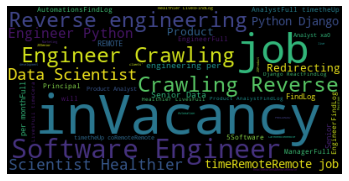

In [283]:
test_list = ['Jooble', 'Vacancy', 'Jobs', 'jobs', 'Engineer']


df['description'] = df['description'].apply(lambda x: x.replace("Jooble",""))

text = df['description'].values

print(text)
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
